# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# !pip install bs4
# !pip install splinter
# !pip install webdriver_manager
# !pip install selenium

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Create url to visit the website 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html' to scrape
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

# In automated browser, go to the above url
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup object
html = browser.html
soup = bs(html, 'html.parser')

# # Check the type
type(soup)

# # Print formatted version of soup
#print(soup.prettify())


bs4.BeautifulSoup

In [6]:
# Extract the table (only one table)
table = soup.find('table')

In [7]:
# Create an empty list to hold the column headers
column_name=[]

# Loop through each row (element) of table
# Extract the header from the row element
# Add the header to the list

for row in table.find_all('tr'):
    for header in row.find_all('th'):
        column_name.append(header.text)
print(column_name)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [8]:
# Create an empty list to hold the row data
row_list=[]  

# Loop through each row with a class of 'data-row'
# Extract data for each row
# Add the row data to the list

for row in table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    #print(data)
    data_val = [y.text for y in data]
    #print(data_val)  
    row_list.append(data_val)

print(row_list)   

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(row_list, columns=column_name)

# Confirm DataFrame was created successfully
mars_weather_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis
Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

Hint You can use the Pandas astype and to_datetime methods to accomplish this task.

In [10]:
# Examine data type of each column
mars_weather_df. dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis

## Convert 'terrestrial_date' to datetime type
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

## Convert 'sol' to integer type
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)

## Convert 'ls' to integer type
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)

## Convert 'month' to integer type
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

## Convert 'min_temp' to float type
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)

## Convert 'pressure' to float type
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
mars_weather_df. dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].max()
mars_months


12

In [14]:
# 2. How many Martian days' worth of data are there? - count number of obsevations/ rows in the table
mars_weather_df['sol'].count()


1867

In [15]:
# 3. What is the average low temperature by month?
mars_weather_df.groupby('month', as_index = False)['min_temp'].mean()


,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


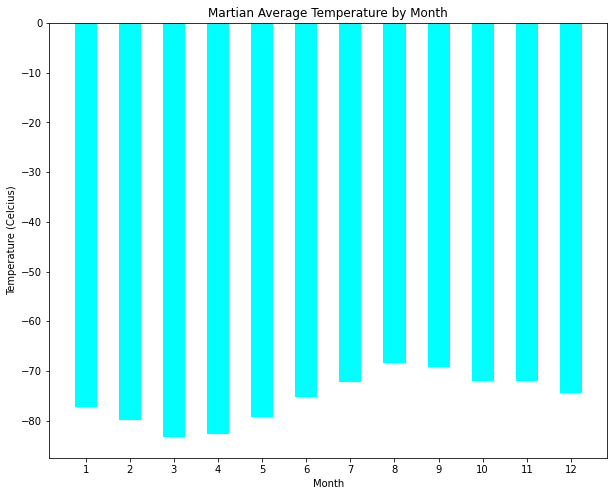

In [16]:
# Plot the average temperature by month
# Convert the previous cell groupby data into a df
avg_temp = mars_weather_df.groupby('month', as_index = False)['min_temp'].mean()
#avg_temp

# Set plot values - for x_axis value, use "month" column AND y_axis values, use "min_temp" column
x_values = avg_temp["month"]
y_values = avg_temp["min_temp"]

# Set the figure size, title, x and y axis labels, and grid parameters for the plot
plt.figure(figsize=(10,8))
plt.title("Martian Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (Celcius)")
plt.xticks(x_values)

# Create the bar plot
plt.bar(x_values, y_values, width = .5, color = "cyan")

# # Save the scatter plot in the "image" folder as figure_1
plt.savefig("images/figure_1.png")

# Show the plot
plt.show()


In [17]:
# Identify the coldest and hottest month in Curiosity's location
print(avg_temp[avg_temp.min_temp == avg_temp.min_temp.min()])

   month   min_temp
2      3 -83.307292


In [18]:
# Identify the hottest month in Curiosity's location
print(avg_temp[avg_temp.min_temp == avg_temp.min_temp.max()])


   month   min_temp
7      8 -68.382979


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



In [19]:
# 4. Average pressure by Martian month
mars_weather_df.groupby('month')['pressure'].mean()


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

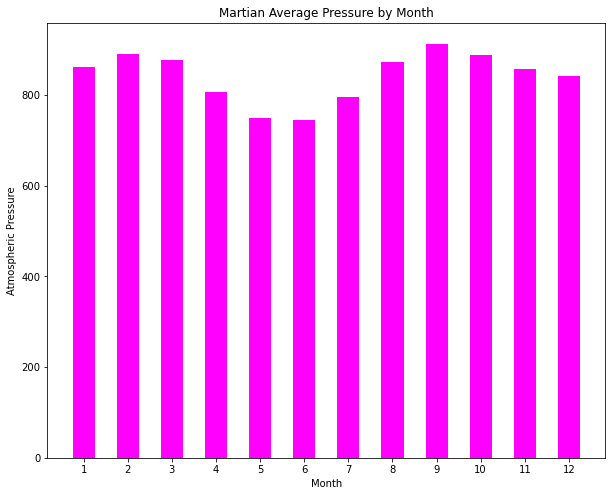

In [20]:
# Plot the average pressure by month
# Convert the previous cell groupby data into a df
avg_pressure = mars_weather_df.groupby('month', as_index = False)['pressure'].mean()
avg_pressure

# Set plot values - for x_axis value, use "month" column AND y_axis values, use "pressure" column
x_values = avg_pressure["month"]
y_values = avg_pressure["pressure"]

# Set the figure size, title, x and y axis labels for the plot
plt.figure(figsize=(10,8))
plt.title("Martian Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.xticks(x_values)

# Create the scatter plot
plt.bar(x_values, y_values, width = .5, color = "fuchsia")

# # Save the scatter plot in the "image" folder as figure_1
plt.savefig("images/figure_2.png")

# Show the plot
plt.show()


In [21]:
# Identify the lowest atmospheric pressure month in Curiosity's location
print(avg_pressure[avg_pressure.pressure == avg_pressure.pressure.min()])

   month    pressure
5      6  745.054422


In [22]:
# Identify the highest atmospheric pressure month in Curiosity's location
print(avg_pressure[avg_pressure.pressure == avg_pressure.pressure.max()])

   month   pressure
8      9  913.30597


Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

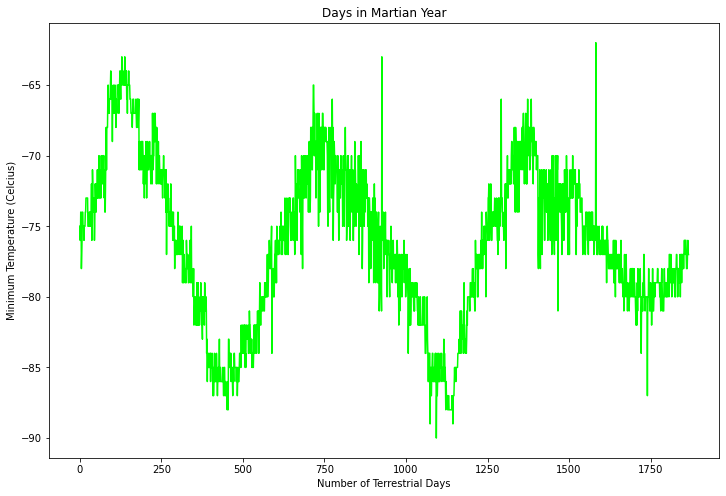

In [23]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Set plot values
x_values = mars_weather_df["terrestrial_date"]
y_values = mars_weather_df["min_temp"]

# Set the figure size, title, x and y axis labels for the plot
plt.figure(figsize=(12,8))
plt.title("Days in Martian Year")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (Celcius)")

# Create the scatter plot
plt.plot(x_values.index.values, y_values, color = "lime")

# # Save the scatter plot in the "image" folder as figure_1
plt.savefig("images/figure_3.png")

# Show the plot
plt.show()


The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv')


In [25]:
browser.quit()